In [6]:
#Exercise 1
from sklearn.linear_model import LogisticRegression
import numpy as np
X = [[0],[0.1],[0.2], [1],[1.1],[1.2], [1.3]]
y = [0,0,0,1,1,1,0]
model = LogisticRegression()
model.fit(X,y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [3]:
x_pred= [[0.5]]
predictions = model.predict(x_pred)
print(predictions)

[0]


In [4]:
print("probability :",model.predict_proba(x_pred))


probability : [[0.61450206 0.38549794]]


In [5]:
print(f"coef_ :{model.coef_} \nintercept_ :{model.intercept_}\nscore : {model.score(X,y)}")

coef_ :[[0.81793264]] 
intercept_ :[-0.87524276]
score : 0.7142857142857143


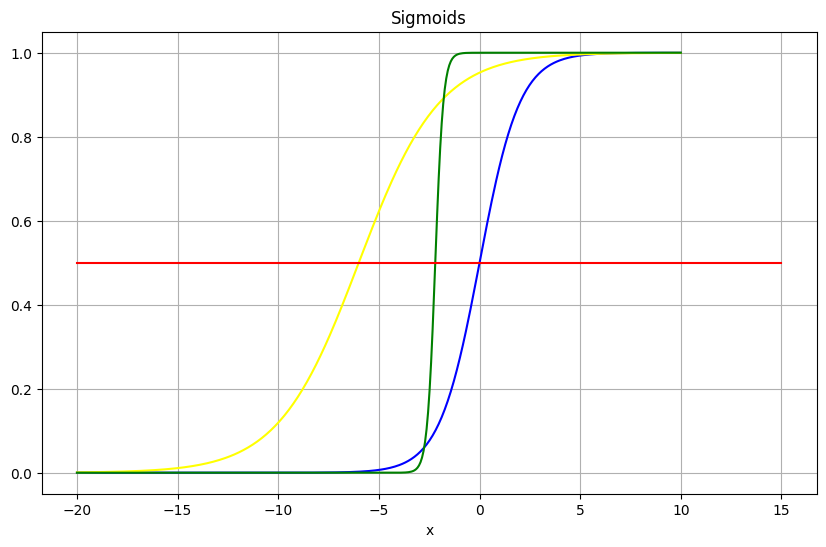

In [8]:
#Exercise 2

import matplotlib.pyplot as plt

def sigmoid(x): 
    return 1/(1+np.exp(-x))
def sigmoid1(x):
    return 1/(1+np.exp(-(0.5*x+3)))
def sigmoid2(x):
    return 1/(1+np.exp(-(5*x+11)))


x = np.linspace(-20,10,400)
y_standard = sigmoid(x)
y1 =sigmoid1(x)
y2 =sigmoid2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_standard, label='Standard Sigmoid', color='blue')
plt.plot(x, y1, label='Sigmoid1: 0.5*x + 3', color='yellow')
plt.plot(x, y2, label='Sigmoid2: 5*x + 11', color='green')
plt.plot([-20, 15], [0.5, 0.5], 'r-', label='Probability = 0.5')
plt.xlabel('x')
plt.title('Sigmoids')
plt.grid(True)
plt.show()


In [9]:
#Exercise 3
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)
print(X.shape)
print(y.shape)


(100, 1)
(100,)


Text(0.5, 1.0, '1D Classification Data')

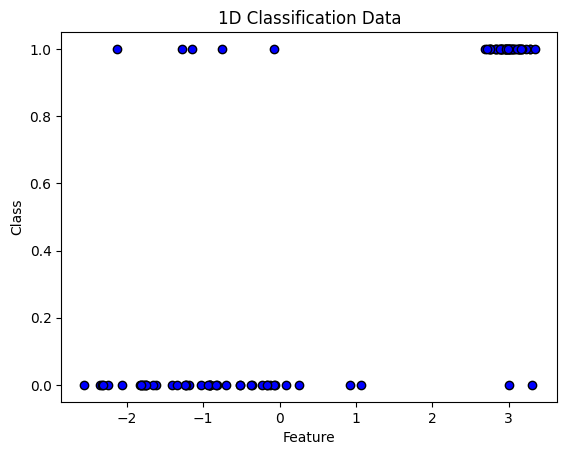

In [10]:
plt.scatter(X, y, c='blue', edgecolor='k')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('1D Classification Data')

In [11]:
def predict_probability(coefs, intercept, X):
    coef, inter = coefs[0][0], intercept[0]
    z = coef * X + inter
    probabilities = 1 / (1 + np.exp(-z))
    return probabilities

def predict_class(coefs, intercept, X):
    probs = predict_probability(coefs, intercept, X)
    return (probs >= 0.5).astype(int)

print(np.allclose(model.predict_proba(X)[:, 1], predict_probability(model.coef_, model.intercept_, X.ravel())))
print(np.array_equal(model.predict(X), predict_class(model.coef_, model.intercept_, X.ravel())))



True
True


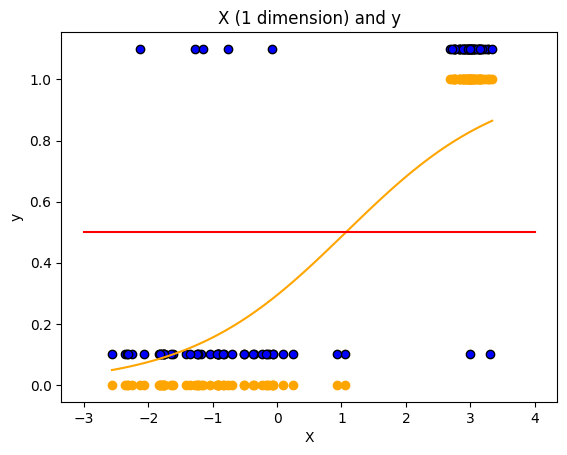

In [12]:
x_vals = np.linspace(X.min(), X.max(), 100)
sigmoid_vals = 1 / (1 + np.exp(-(model.coef_[0][0] * x_vals + model.intercept_[0])))
pred_classes = predict_class(model.coef_, model.intercept_, X.ravel())
plt.scatter(X, y+0.1, c='blue', edgecolor='k', label='True')
plt.scatter(X, pred_classes, c='orange', marker='o', label='Predicted')
plt.plot(x_vals, sigmoid_vals, c='orange', label='Fitted Sigmoid')
plt.plot([-3, 4], [0.5, 0.5], 'r-', label='Probability = 0.5')
plt.xlabel('X')
plt.ylabel('y')
plt.title('X (1 dimension) and y')
plt.show()


In [13]:
shift = 0.1 * (2 * pred_classes - 1) 
print("Predicted classes (first 10):", pred_classes[:10])
print("Shift values (first 10):", shift[:10])
print("Predicted y positions (first 10):", (pred_classes + shift)[:10])

Predicted classes (first 10): [0 1 0 1 1 1 0 0 1 1]
Shift values (first 10): [-0.1  0.1 -0.1  0.1  0.1  0.1 -0.1 -0.1  0.1  0.1]
Predicted y positions (first 10): [-0.1  1.1 -0.1  1.1  1.1  1.1 -0.1 -0.1  1.1  1.1]


In [14]:
X2, y2 = make_classification(n_features=2,
                            n_redundant=0,
                            n_samples=250,
                            n_classes=2,
                            n_clusters_per_class=1,
                            flip_y=0.05,
                            class_sep=3,
                            random_state=43)
model2 = LogisticRegression()
model2.fit(X2, y2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

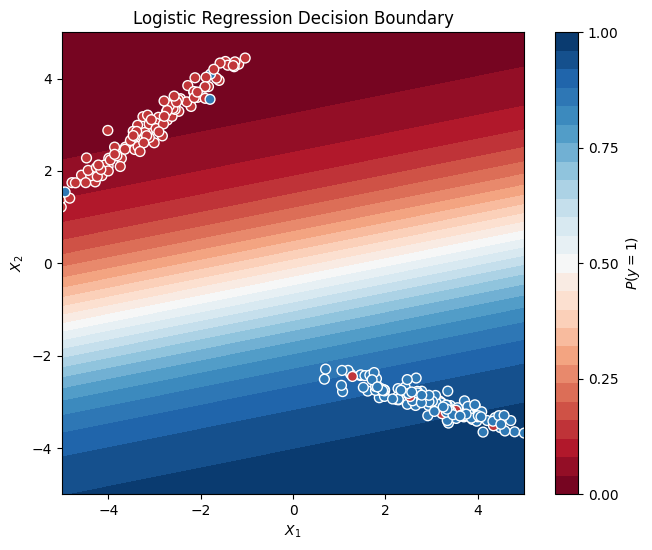

In [15]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model2.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X2[:,0], X2[:, 1], c=y2, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.title('Logistic Regression Decision Boundary')
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")


In [16]:
#Exercise 4
from sklearn.model_selection import train_test_split

X = np.arange(1, 21).reshape(10, -1)  
y = np.zeros(10) 
y[7:] = 1  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:\n", X_test)
print("y_test:\n", y_test)

# Proportions
prop_train = np.mean(y_train)  
prop_test = np.mean(y_test)    
print("Proportion class 1 in train:", prop_train)
print("Proportion class 1 in test:", prop_test)

X_train: [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]
y_train: [0. 0. 0. 0. 0. 0. 0. 1.]
X_test:
 [[17 18]
 [19 20]]
y_test:
 [1. 1.]
Proportion class 1 in train: 0.125
Proportion class 1 in test: 1.0


In [17]:
# New data
X2 = np.arange(1, 201).reshape(100, -1)  # 100 samples, 2 features
y2 = np.zeros(100)
y2[70:] = 1  # 30 class 1, 70 class 0

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
print("Proportion class 1 in train:", np.mean(y_train2))
print("Proportion class 1 in test:", np.mean(y_test2))

Proportion class 1 in train: 0.3
Proportion class 1 in test: 0.3


In [18]:
#Exercise 5
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

cancer_df=pd.read_csv('breast-cancer-wisconsin.data',header=None)
cancer_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [19]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 
           'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
           'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_df.columns = columns
cancer_df.set_index('Sample code number',inplace=True)

cancer_df = cancer_df.replace('?', pd.NA)
for col in cancer_df.columns[1:-1]:  # Skip ID and Class
    cancer_df[col] = pd.to_numeric(cancer_df[col], errors='coerce')
    cancer_df[col] = cancer_df[col].fillna(cancer_df[col].median())

cancer_df.columns



Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [20]:
cancer_df['Class'] = cancer_df['Class'].map({2: 0, 4: 1})

prop_benign = 1 - cancer_df['Class'].mean()  # Since 0 is benign
print("Proportion Benign:", prop_benign)



Proportion Benign: 0.6552217453505007


In [22]:
 #Split
X = cancer_df.drop('Class', axis=1)
y = cancer_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=43)

# Fit and predict
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train accuracy:", train_score)
print("Test accuracy:", test_score)



Train accuracy: 0.9695885509838998
Test accuracy: 0.9642857142857143


In [23]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)
cm1 = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_train, y_pred1)
print("Confusion Matrix on train:\n", cm)
print("Confusion Matrix on test:\n", cm1)

Confusion Matrix on train:
 [[357   9]
 [  8 185]]
Confusion Matrix on test:
 [[90  2]
 [ 3 45]]


In [25]:
#Exercise 6(Optional)
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(data=iris['data'], columns=iris.feature_names)
y = pd.DataFrame(data=iris['target'], columns=['target'])
y=iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=43)

def train(X_train, y_train):
    # For class 0 vs 1&2
    y0 = (y_train == 0).astype(int)  # 1 if 0, 0 otherwise
    clf0 = LogisticRegression()
    clf0.fit(X_train, y0)
    
    # For class 1 vs 0&2
    y1 = (y_train == 1).astype(int)
    clf1 = LogisticRegression()
    clf1.fit(X_train, y1)
    
    # For class 2 vs 0&1
    y2 = (y_train == 2).astype(int)
    clf2 = LogisticRegression()
    clf2.fit(X_train, y2)
    
    return clf0, clf1, clf2

def predict_one_vs_all(X, clf0, clf1, clf2):
    prob0 = clf0.predict_proba(X)[:, 1]  # Prob of being class 0
    prob1 = clf1.predict_proba(X)[:, 1]  # Prob of being class 1
    prob2 = clf2.predict_proba(X)[:, 1]  # Prob of being class 2
    
    # Stack probs, find max per row
    probs = np.column_stack((prob0, prob1, prob2))
    classes = np.argmax(probs, axis=1)  # Index of highest prob
    return classes

from sklearn.multiclass import OneVsRestClassifier

clf_multi = OneVsRestClassifier(LogisticRegression())
clf_multi.fit(X_train, y_train)
y_pred_builtin = clf_multi.predict(X_test)


# Your custom prediction
clf0, clf1, clf2 = train(X_train, y_train)
y_pred_custom = predict_one_vs_all(X_test, clf0, clf1, clf2)

print("Custom predictions:", y_pred_custom)
print("Built in predictions:", y_pred_builtin)



Custom predictions: [0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0]
Built in predictions: [0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0]
